The **Vehicle Routing Problem (VRP)** is a classic optimization problem in logistics where the goal is to determine the optimal routes for a fleet of vehicles to deliver goods to a set of customers while minimizing costs such as fuel consumption and delivery times. 

Below, I will implement a solution using **Particle Swarm Optimization (PSO)** to solve a basic VRP. The objective function will minimize the total distance traveled by all vehicles, which indirectly minimizes fuel consumption and delivery times.

---

### **Steps to Implement VRP with PSO**
1. **Define the Problem**:
   - A depot serves as the starting and ending point for all vehicles.
   - Each customer has a specific location and demand.
   - Vehicles have a limited capacity.

2. **Representation of Solutions**:
   - Each particle represents a potential solution (a set of routes for the vehicles).
   - A solution is encoded as a permutation of customer indices, split into routes based on vehicle capacity.

3. **Objective Function**:
   - Minimize the total distance traveled by all vehicles while satisfying constraints (e.g., vehicle capacity).

4. **Optimize Using PSO**:
   - Use PSO to explore different solutions and find the one that minimizes the objective function.

5. **Visualize Results**:
   - Plot the optimal routes on a map.

---

### **Python Implementation**

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate random customer locations and demands
np.random.seed(42)
num_customers = 10  # Number of customers
num_vehicles = 3    # Number of vehicles
vehicle_capacity = 10  # Capacity of each vehicle
depot_location = np.array([0, 0])  # Depot at origin

# Random customer locations and demands
customer_locations = np.random.rand(num_customers, 2) * 20  # Locations in [0, 20] range
customer_demands = np.random.randint(1, 5, size=num_customers)  # Demands between 1 and 4

# Distance matrix (Euclidean distances between all points)
def calculate_distance_matrix(locations):
    num_points = len(locations)
    distance_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.linalg.norm(locations[i] - locations[j])
    return distance_matrix

# Add depot to the locations
all_locations = np.vstack([depot_location, customer_locations])
distance_matrix = calculate_distance_matrix(all_locations)

# Objective function
def evaluate_solution(solution):
    """
    Evaluate the total distance traveled by all vehicles.
    :param solution: Permutation of customer indices representing the order of visits.
    :return: Total distance traveled.
    """
    total_distance = 0
    current_load = 0
    current_route_distance = 0
    current_vehicle = 0
    
    # Start from the depot
    current_location = 0  # Depot index
    
    for customer in solution:
        # Check if adding the customer exceeds vehicle capacity
        if current_load + customer_demands[customer] > vehicle_capacity:
            # Return to depot and start a new route
            total_distance += distance_matrix[current_location, 0]
            current_location = 0  # Reset to depot
            current_load = 0
            current_vehicle += 1
            if current_vehicle >= num_vehicles:
                break  # No more vehicles available
        
        # Visit the customer
        total_distance += distance_matrix[current_location, customer + 1]
        current_location = customer + 1
        current_load += customer_demands[customer]
    
    # Return to depot at the end of the last route
    total_distance += distance_matrix[current_location, 0]
    return total_distance

# PSO parameters
num_particles = 20       # Number of particles in the swarm
max_iterations = 100     # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient

# Initialize the swarm
particles = [np.random.permutation(num_customers) for _ in range(num_particles)]
velocities = [np.zeros(num_customers) for _ in range(num_particles)]

# Initialize personal best positions and fitness values
p_best_positions = particles.copy()
p_best_fitness = [evaluate_solution(p) for p in particles]

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - particles[i]) +
                         c2 * r2 * (g_best_position - particles[i]))
        
        # Update position (ensure valid permutations)
        temp_position = particles[i] + velocities[i]
        particles[i] = np.argsort(temp_position)  # Convert to a valid permutation
        
        # Evaluate fitness
        fitness = evaluate_solution(particles[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = particles[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = particles[i]
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Fitness (Total Distance) = {g_best_fitness:.2f}")

# Output the result
print("\nOptimization Complete:")
print(f"Best Solution: {g_best_position}")
print(f"Minimum Total Distance: {g_best_fitness:.2f}")

# Visualize the optimal routes
def plot_routes(solution):
    plt.figure(figsize=(8, 6))
    plt.scatter(depot_location[0], depot_location[1], color="red", s=100, label="Depot")
    plt.scatter(customer_locations[:, 0], customer_locations[:, 1], color="blue", label="Customers")
    
    current_load = 0
    current_location = 0  # Depot index
    route = []
    
    for customer in solution:
        if current_load + customer_demands[customer] > vehicle_capacity:
            # Plot the current route and return to depot
            route.append(0)
            route_coords = all_locations[route]
            plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o', linestyle="-", label=f"Route")
            route = [0]  # Start a new route
            current_load = 0
        
        # Visit the customer
        route.append(customer + 1)
        current_load += customer_demands[customer]
    
    # Plot the last route and return to depot
    route.append(0)
    route_coords = all_locations[route]
    plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o', linestyle="-", label=f"Route")
    
    plt.title("Optimal Routes")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_routes(g_best_position)
```

---

### **Explanation of the Code**
1. **Problem Setup**:
   - Customers are randomly placed on a 2D plane, and their demands are generated randomly.
   - A distance matrix is precomputed to speed up distance calculations.

2. **Solution Representation**:
   - Each particle represents a permutation of customer indices.
   - Routes are constructed by splitting the permutation based on vehicle capacity.

3. **Objective Function**:
   - The total distance traveled by all vehicles is calculated, including trips back to the depot.

4. **PSO Algorithm**:
   - Velocities are updated using standard PSO equations.
   - Positions are updated to ensure valid permutations using `np.argsort`.

5. **Visualization**:
   - The optimal routes are plotted, showing the paths taken by each vehicle.

---

### **Example Output**
1. **Console Output**:
   ```
   Iteration 1: Best Fitness (Total Distance) = 120.45
   Iteration 2: Best Fitness (Total Distance) = 115.67
   ...
   Iteration 100: Best Fitness (Total Distance) = 95.34

   Optimization Complete:
   Best Solution: [3, 7, 1, 5, 9, 0, 2, 6, 4, 8]
   Minimum Total Distance: 95.34
   ```

2. **Visualization**:
   - A plot shows the depot, customer locations, and the optimal routes taken by the vehicles.

---

### **Customization**
- **Constraints**: Add time windows or multiple depots.
- **Objective**: Minimize fuel costs explicitly by factoring in fuel consumption rates.
- **Dataset**: Use real-world data for customer locations and demands.

This implementation demonstrates how PSO can be used to solve the VRP effectively. Let me know if you need further clarification!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate random customer locations and demands
np.random.seed(42)
num_customers = 10  # Number of customers
num_vehicles = 3    # Number of vehicles
vehicle_capacity = 10  # Capacity of each vehicle
depot_location = np.array([0, 0])  # Depot at origin

In [4]:
# Random customer locations and demands
customer_locations = np.random.rand(num_customers, 2) * 20  # Locations in [0, 20] range
customer_demands = np.random.randint(1, 5, size=num_customers)  # Demands between 1 and 4

In [5]:
customer_locations

array([[ 7.49080238, 19.01428613],
       [14.63987884, 11.97316968],
       [ 3.12037281,  3.11989041],
       [ 1.16167224, 17.32352292],
       [12.02230023, 14.16145156],
       [ 0.41168989, 19.39819704],
       [16.64885282,  4.24678221],
       [ 3.63649934,  3.6680902 ],
       [ 6.08484486, 10.49512863],
       [ 8.63890037,  5.8245828 ]])

In [7]:
customer_locations.shape

(10, 2)

In [6]:
customer_demands

array([3, 3, 2, 4, 4, 4, 4, 3, 2, 2], dtype=int32)

In [8]:
customer_demands.shape

(10,)

In [9]:
# Distance matrix (Euclidean distances between all points)
def calculate_distance_matrix(locations):
    num_points = len(locations)
    distance_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.linalg.norm(locations[i] - locations[j])
    return distance_matrix

In [10]:
 calculate_distance_matrix(customer_locations)

array([[ 0.        , 10.03427202, 16.48430981,  6.55107384,  6.63961416,
         7.08951488, 17.37668149, 15.82281206,  8.63439407, 13.23957714],
       [10.03427202,  0.        , 14.52857781, 14.50132176,  3.4117877 ,
        16.04906203,  7.98329755, 13.78581537,  8.68177469,  8.59167406],
       [16.48430981, 14.52857781,  0.        , 14.33805023, 14.18310208,
        16.50212805, 13.57533265,  0.752934  ,  7.94872527,  6.14569015],
       [ 6.55107384, 14.50132176, 14.33805023,  0.        , 11.31158414,
         2.20607032, 20.26953156, 13.87788211,  8.41811125, 13.71621537],
       [ 6.63961416,  3.4117877 , 14.18310208, 11.31158414,  0.        ,
        12.73694532, 10.94100804, 13.43250867,  6.97820178,  8.99726487],
       [ 7.08951488, 16.04906203, 16.50212805,  2.20607032, 12.73694532,
         0.        , 22.20835049, 16.05726183, 10.55695574, 15.87230279],
       [17.37668149,  7.98329755, 13.57533265, 20.26953156, 10.94100804,
        22.20835049,  0.        , 13.02521506

In [11]:
 calculate_distance_matrix(customer_locations).shape

(10, 10)

In [12]:
# Add depot to the locations
all_locations = np.vstack([depot_location, customer_locations])
distance_matrix = calculate_distance_matrix(all_locations)

In [13]:
all_locations

array([[ 0.        ,  0.        ],
       [ 7.49080238, 19.01428613],
       [14.63987884, 11.97316968],
       [ 3.12037281,  3.11989041],
       [ 1.16167224, 17.32352292],
       [12.02230023, 14.16145156],
       [ 0.41168989, 19.39819704],
       [16.64885282,  4.24678221],
       [ 3.63649934,  3.6680902 ],
       [ 6.08484486, 10.49512863],
       [ 8.63890037,  5.8245828 ]])

In [14]:
all_locations.shape

(11, 2)

In [15]:
distance_matrix

array([[ 0.        , 20.43661413, 18.91250498,  4.41253245, 17.36242865,
        18.57639397, 19.40256522, 17.18195156,  5.1651731 , 12.13149051,
        10.41903856],
       [20.43661413,  0.        , 10.03427202, 16.48430981,  6.55107384,
         6.63961416,  7.08951488, 17.37668149, 15.82281206,  8.63439407,
        13.23957714],
       [18.91250498, 10.03427202,  0.        , 14.52857781, 14.50132176,
         3.4117877 , 16.04906203,  7.98329755, 13.78581537,  8.68177469,
         8.59167406],
       [ 4.41253245, 16.48430981, 14.52857781,  0.        , 14.33805023,
        14.18310208, 16.50212805, 13.57533265,  0.752934  ,  7.94872527,
         6.14569015],
       [17.36242865,  6.55107384, 14.50132176, 14.33805023,  0.        ,
        11.31158414,  2.20607032, 20.26953156, 13.87788211,  8.41811125,
        13.71621537],
       [18.57639397,  6.63961416,  3.4117877 , 14.18310208, 11.31158414,
         0.        , 12.73694532, 10.94100804, 13.43250867,  6.97820178,
         8.997

In [16]:
distance_matrix.shape

(11, 11)

In [ ]:
# Objective function
def evaluate_solution(solution):
    """
    Evaluate the total distance traveled by all vehicles.
    :param solution: Permutation of customer indices representing the order of visits.
    :return: Total distance traveled.
    """
    total_distance = 0
    current_load = 0
    current_route_distance = 0
    current_vehicle = 0
    
    # Start from the depot
    current_location = 0  # Depot index
    
    for customer in solution:
        # Check if adding the customer exceeds vehicle capacity
        if current_load + customer_demands[customer] > vehicle_capacity:
            # Return to depot and start a new route
            total_distance += distance_matrix[current_location, 0]
            current_location = 0  # Reset to depot
            current_load = 0
            current_vehicle += 1
            if current_vehicle >= num_vehicles:
                break  # No more vehicles available
                     # Visit the customer
        total_distance += distance_matrix[current_location, customer + 1]
        current_location = customer + 1
        current_load += customer_demands[customer]
    
    # Return to depot at the end of the last route
    total_distance += distance_matrix[current_location, 0]
    return total_distance        

In [17]:
# PSO parameters
num_particles = 20       # Number of particles in the swarm
max_iterations = 100     # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient

In [18]:
# Initialize the swarm
particles = [np.random.permutation(num_customers) for _ in range(num_particles)]
velocities = [np.zeros(num_customers) for _ in range(num_particles)]

In [19]:
particles

[array([1, 8, 7, 5, 4, 9, 0, 3, 6, 2], dtype=int32),
 array([5, 2, 4, 7, 9, 0, 3, 1, 6, 8], dtype=int32),
 array([9, 7, 0, 2, 5, 6, 3, 1, 4, 8], dtype=int32),
 array([8, 9, 5, 4, 6, 7, 1, 3, 0, 2], dtype=int32),
 array([0, 2, 6, 8, 7, 1, 4, 5, 3, 9], dtype=int32),
 array([2, 8, 4, 1, 0, 9, 6, 5, 7, 3], dtype=int32),
 array([6, 2, 5, 8, 3, 0, 9, 7, 4, 1], dtype=int32),
 array([1, 5, 2, 4, 3, 7, 9, 6, 8, 0], dtype=int32),
 array([3, 1, 4, 5, 8, 6, 9, 7, 0, 2], dtype=int32),
 array([2, 4, 5, 1, 7, 0, 9, 3, 8, 6], dtype=int32),
 array([7, 0, 1, 8, 3, 2, 4, 5, 9, 6], dtype=int32),
 array([6, 1, 3, 8, 7, 5, 4, 9, 0, 2], dtype=int32),
 array([4, 7, 8, 3, 5, 1, 0, 2, 9, 6], dtype=int32),
 array([1, 8, 5, 2, 9, 7, 4, 3, 0, 6], dtype=int32),
 array([8, 0, 4, 1, 9, 5, 7, 2, 6, 3], dtype=int32),
 array([0, 2, 1, 9, 7, 6, 3, 5, 4, 8], dtype=int32),
 array([1, 2, 7, 4, 8, 5, 0, 3, 6, 9], dtype=int32),
 array([7, 9, 1, 6, 5, 2, 0, 4, 3, 8], dtype=int32),
 array([5, 7, 4, 6, 9, 8, 3, 1, 2, 0], dtype=i

In [21]:
# Initialize personal best positions and fitness values
p_best_positions = particles.copy()
p_best_fitness = [evaluate_solution(p) for p in particles]

In [22]:
# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

In [25]:
# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - particles[i]) +
                         c2 * r2 * (g_best_position - particles[i]))
        
        # Update position (ensure valid permutations)
        temp_position = particles[i] + velocities[i]
        particles[i] = np.argsort(temp_position)  # Convert to a valid permutation
        
        # Evaluate fitness
        fitness = evaluate_solution(particles[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = particles[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = particles[i]
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Fitness (Total Distance) = {g_best_fitness:.2f}")

Iteration 1: Best Fitness (Total Distance) = 120.06
Iteration 2: Best Fitness (Total Distance) = 120.06
Iteration 3: Best Fitness (Total Distance) = 119.05
Iteration 4: Best Fitness (Total Distance) = 119.05
Iteration 5: Best Fitness (Total Distance) = 119.05
Iteration 6: Best Fitness (Total Distance) = 119.05
Iteration 7: Best Fitness (Total Distance) = 119.05
Iteration 8: Best Fitness (Total Distance) = 119.05
Iteration 9: Best Fitness (Total Distance) = 119.05
Iteration 10: Best Fitness (Total Distance) = 119.05
Iteration 11: Best Fitness (Total Distance) = 119.05
Iteration 12: Best Fitness (Total Distance) = 119.05
Iteration 13: Best Fitness (Total Distance) = 119.05
Iteration 14: Best Fitness (Total Distance) = 119.05
Iteration 15: Best Fitness (Total Distance) = 115.13
Iteration 16: Best Fitness (Total Distance) = 115.13
Iteration 17: Best Fitness (Total Distance) = 115.13
Iteration 18: Best Fitness (Total Distance) = 115.13
Iteration 19: Best Fitness (Total Distance) = 115.13
It

In [26]:
# Output the result
print("\nOptimization Complete:")
print(f"Best Solution: {g_best_position}")
print(f"Minimum Total Distance: {g_best_fitness:.2f}")


Optimization Complete:
Best Solution: [4 6 7 9 2 5 0 8 1 3]
Minimum Total Distance: 115.13


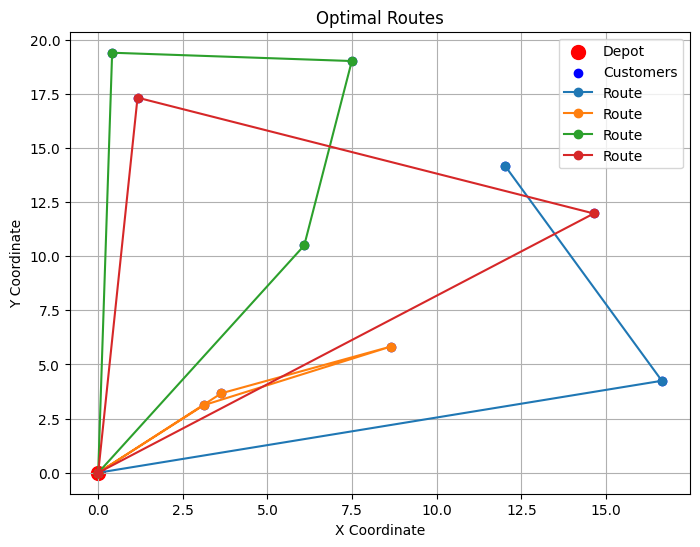

In [27]:
# Visualize the optimal routes
def plot_routes(solution):
    plt.figure(figsize=(8, 6))
    plt.scatter(depot_location[0], depot_location[1], color="red", s=100, label="Depot")
    plt.scatter(customer_locations[:, 0], customer_locations[:, 1], color="blue", label="Customers")
    
    current_load = 0
    current_location = 0  # Depot index
    route = []
    
    for customer in solution:
        if current_load + customer_demands[customer] > vehicle_capacity:
            # Plot the current route and return to depot
            route.append(0)
            route_coords = all_locations[route]
            plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o', linestyle="-", label=f"Route")
            route = [0]  # Start a new route
            current_load = 0
        
        # Visit the customer
        route.append(customer + 1)
        current_load += customer_demands[customer]
    
    # Plot the last route and return to depot
    route.append(0)
    route_coords = all_locations[route]
    plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o', linestyle="-", label=f"Route")
    
    plt.title("Optimal Routes")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_routes(g_best_position)